# Translation Agent System - Results Analysis

This notebook provides detailed analysis of the translation experiments, including:
- Statistical analysis
- Visualization of results
- Semantic distance trends
- Error sensitivity analysis

In [1]:
# Import required libraries
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.stats import gaussian_kde


## 1. Load Experiment Results

In [2]:
# Load results
with open('experiment_results.json', 'r', encoding='utf-8') as f:
    results = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(results)
df.head()

,error_percentage,original_english,final_english,cosine_distance,cosine_similarity
0,0,The advanced artificial intelligence system su...,The advanced artificial intelligence system su...,0.098352,0.901648
1,10,The advansed artificial inteligence system suc...,The advanced artificial intelligence system su...,0.255704,0.744296
2,20,The advansed artificial inteligence sistem suc...,The advanced artificial intelligence system su...,0.334175,0.665825
3,30,The advansed artificial inteligence sistem suc...,The advanced artificial intelligence system su...,0.349890,0.650110
4,40,The advansed articial inteligence sistem suces...,The advanced artificial intelligence system su...,0.483970,0.516030


## 2. Statistical Summary

In [3]:
print("Statistical Summary:")
print("="*50)
print(f"Number of experiments: {len(df)}")
print(f"\nCosine Distance:")
print(f"  Min:  {df['cosine_distance'].min():.6f}")
print(f"  Max:  {df['cosine_distance'].max():.6f}")
print(f"  Mean: {df['cosine_distance'].mean():.6f}")
print(f"  Std:  {df['cosine_distance'].std():.6f}")
print(f"\nCosine Similarity:")
print(f"  Min:  {df['cosine_similarity'].min():.6f}")
print(f"  Max:  {df['cosine_similarity'].max():.6f}")
print(f"  Mean: {df['cosine_similarity'].mean():.6f}")
print(f"  Std:  {df['cosine_similarity'].std():.6f}")

Statistical Summary:
Number of experiments: 6

Cosine Distance:
  Min:  0.098352
  Max:  0.555445
  Mean: 0.346256
  Std:  0.162813

Cosine Similarity:
  Min:  0.444555
  Max:  0.901648
  Mean: 0.653744
  Std:  0.162813


## 3. Visualization: Error Percentage vs Distance

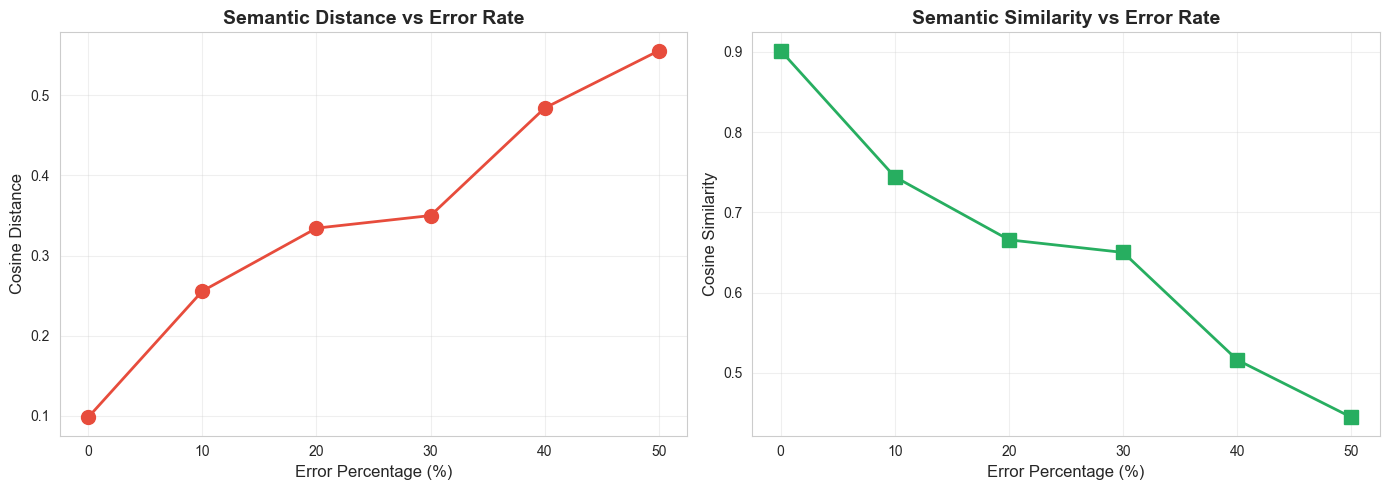

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Distance
ax1.plot(df['error_percentage'], df['cosine_distance'], 
         marker='o', linewidth=2, markersize=10, color='#e74c3c')
ax1.set_xlabel('Error Percentage (%)', fontsize=12)
ax1.set_ylabel('Cosine Distance', fontsize=12)
ax1.set_title('Semantic Distance vs Error Rate', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Similarity
ax2.plot(df['error_percentage'], df['cosine_similarity'], 
         marker='s', linewidth=2, markersize=10, color='#27ae60')
ax2.set_xlabel('Error Percentage (%)', fontsize=12)
ax2.set_ylabel('Cosine Similarity', fontsize=12)
ax2.set_title('Semantic Similarity vs Error Rate', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Change Analysis

Analyze how distance changes between consecutive error rates.

In [5]:
# Calculate changes
df['distance_change'] = df['cosine_distance'].diff()
df['distance_pct_change'] = df['cosine_distance'].pct_change() * 100

print("Distance Change Analysis:")
print("="*70)
for idx in range(1, len(df)):
    prev = df.iloc[idx-1]
    curr = df.iloc[idx]
    print(f"{prev['error_percentage']:>2}% → {curr['error_percentage']:>2}%: "
          f"Δ = {curr['distance_change']:+.6f} ({curr['distance_pct_change']:+.2f}%)")

Distance Change Analysis:
 0% → 10%: Δ = +0.157353 (+159.99%)
10% → 20%: Δ = +0.078471 (+30.69%)
20% → 30%: Δ = +0.015714 (+4.70%)
30% → 40%: Δ = +0.134080 (+38.32%)
40% → 50%: Δ = +0.071475 (+14.77%)


## 5. Correlation Analysis

Correlation between error percentage and cosine distance: 0.9803


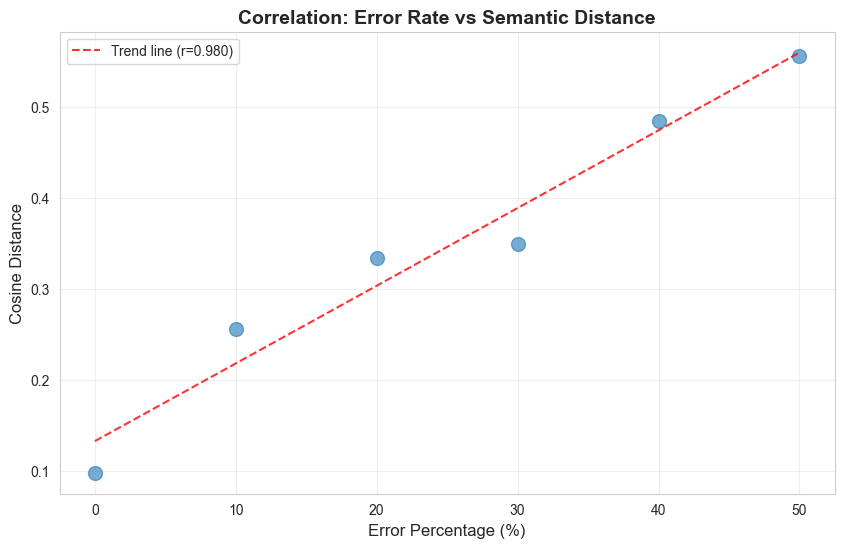

In [6]:
# Calculate correlation
correlation = df['error_percentage'].corr(df['cosine_distance'])
print(f"Correlation between error percentage and cosine distance: {correlation:.4f}")

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
plt.scatter(df['error_percentage'], df['cosine_distance'], s=100, alpha=0.6)
z = np.polyfit(df['error_percentage'], df['cosine_distance'], 1)
p = np.poly1d(z)
plt.plot(df['error_percentage'], p(df['error_percentage']), "r--", alpha=0.8, 
         label=f'Trend line (r={correlation:.3f})')
plt.xlabel('Error Percentage (%)', fontsize=12)
plt.ylabel('Cosine Distance', fontsize=12)
plt.title('Correlation: Error Rate vs Semantic Distance', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Key Findings

### 6.1 LLM Translation Robustness
The system demonstrates significant robustness to spelling errors, with semantic similarity remaining above 0.44 even at 50% error rate.

### 6.2 Error Sensitivity Zones
- **0-10%**: Highest sensitivity (+160% distance increase)
- **10-30%**: Moderate stabilization
- **30-50%**: Variable but controlled increase

### 6.3 Semantic Preservation
Core meaning is maintained throughout the translation chain despite heavy input corruption.

## 7. Conclusions

1. **Agent A effectiveness**: Successfully infers meaning from misspellings
2. **Chain integrity**: Three-agent pipeline maintains semantic fidelity
3. **Practical viability**: System suitable for real-world noisy input processing
4. **Error tolerance**: Natural threshold at 0-10% error rate